<a href="https://colab.research.google.com/github/jaipandotco2525/python_chem/blob/master/practice_1_rdkit_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAIST DSC Project Based Learning 2019 
# chem_project team2


### RDKIt

[RDKit](https://www.rdkit.org/) is a Open-Source Cheminformatics Software, which is very powerful and useful toolkit, however, it is not installed Google Colaboratory.

Thus, you need install rdkit packages first. Since Google Colab is a virtual server which is initialized for every session, you have to install every session.

Run the commands below. It will take a few minute. Please be patient.


In [0]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2019-08-02 05:07:10--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75257002 (72M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  71.77M   110MB/s    in 0.7s    

2019-08-02 05:07:11 (110 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [75257002/75257002]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==0.24.0=py37_0
    - bzip2==1.0.8=h7b6447c_0
    - ca-certificates==2019.5.15=0
    - certifi==2019.6.16=py37_0
    - cffi==1.12.3=py37h2e261b9_0
    - chardet==3.0.4=py37_1
    - conda-packag

Now, setup the environments.

In [0]:
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages')

If the all packages have installed properly, the following text will be appeared in the next cell.

`see Chem/index.html in the doc tree for documentation`

In [0]:
import numpy as np
import pandas as pd
import rdkit
from rdkit import Chem
# from rdkit import Chem

print(Chem.__doc__)

 A module for molecules and stuff

 see Chem/index.html in the doc tree for documentation




Prepare some more tools.

In [0]:
from numpy import vectorize as vec
import scipy as sp
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors,PandasTools


### Tox21 data set

Download a datafile `na-ar.sdf` from the link below.

https://drive.google.com/uc?id=1ALUNDgAmpauEa0Oa6-6TOPAG_uDTy0HH&export=download

Download a datafile `washed-nr-er.tsv` from the link below.

https://docs.google.com/uc?id=1N-Qykm94hz8NFPppYgTYcQwiRhqJNimw&export=download

Run the next cell. You will be ask to choose a file to upload, so upload the downloaded file from your local machine.

In [0]:
from google.colab import files
uploaded = files.upload()

Saving nr-ar.sdf to nr-ar.sdf


Run the next cell to confirm the file is correctly uploaded. 

If it is uploaded, file size and file name will be shown.

In [0]:
! ls -la

total 91460
drwxr-xr-x 1 root root     4096 Aug  2 05:08 .
drwxr-xr-x 1 root root     4096 Aug  2 04:49 ..
drwxr-xr-x 1 root root     4096 Jul 30 16:17 .config
-rwxr-xr-x 1 root root 75257002 Jul 29 14:25 Miniconda3-latest-Linux-x86_64.sh
-rw-r--r-- 1 root root 17862205 Aug  2 05:06 nr-ar.sdf
drwxr-xr-x 1 root root     4096 Jul 30 16:17 sample_data
-rw-r--r-- 1 root root   515648 Aug  2 05:03 washed-nr-er.tsv


Next, read the uploaded molecule data.

(Ignore the ERRORs on reading the file)

 `na-ar.sdf` is the original dataset.

`washed-nr-er.tsv` is a curated dataset. Unproper entries such as duplicate entries, inorganic molecules etc. has removed.

In [0]:
mols=PandasTools.LoadSDF('nr-ar.sdf',smilesName='SMILES',molColName='Molecule',includeFingerprints=True)


RDKit ERROR: [05:10:35] Explicit valence for atom # 2 Si, 8, is greater than permitted
RDKit ERROR: [05:10:35] ERROR: Could not sanitize molecule ending on line 153869
RDKit ERROR: [05:10:35] ERROR: Explicit valence for atom # 2 Si, 8, is greater than permitted
RDKit ERROR: [05:10:38] Explicit valence for atom # 3 Cl, 2, is greater than permitted
RDKit ERROR: [05:10:38] ERROR: Could not sanitize molecule ending on line 223779
RDKit WARNING: [05:10:39] Warning: conflicting stereochemistry at atom 9 ignored.
RDKit WARNING: [05:10:39] Warning: conflicting stereochemistry at atom 9 ignored.
RDKit ERROR: [05:10:38] ERROR: Explicit valence for atom # 3 Cl, 2, is greater than permitted
RDKit ERROR: [05:10:41] Explicit valence for atom # 1 Cl, 2, is greater than permitted
RDKit ERROR: [05:10:41] ERROR: Could not sanitize molecule ending on line 339188
RDKit WARNING: [05:10:42] WARNING: not removing hydrogen atom without neighbors
RDKit ERROR: [05:10:41] ERROR: Explicit valence for atom # 1 Cl,

In [0]:
mols_washed = pd.read_csv('washed-nr-er.tsv')


Well, it's good to check detail data structures anytime you load new data.

In [0]:
mols.shape

NameError: ignored

mols_washed.shape

In [0]:
mols.columns

Index(['Active', 'DSSTox_CID', 'FW', 'Formula', 'ID', 'Molecule', 'SMILES'], dtype='object')

`head()` function is good method to browse a large data. 

,Active,DSSTox_CID,FW,Formula,ID,Molecule,SMILES
0,0,26683,1342.5025 (1282.4505+60.0520),C66H87N17O14,NCGC00167516-01,,CC(=O)O.CCNC(=O)C1CCCN1C(=O)C(CCCNC(=N)N)NC(=O)C(CC(C)C)NC(=O)C(Cc1c[nH]c2ccccc12)NC(=O)C(Cc1ccc(O)cc1)NC(=O)C(CO)NC(=O)C(Cc1c[nH]c2ccccc12)NC(=O)C(Cc1c[nH]cn1)NC(=O)C1CCC(=O)N1
1,0,26837,419.0430 (382.5820+36.4609),C25H39ClN2O,NCGC00181091-01,,CCCCCCOc1ccc(C(=N)N(CCCC)CCCC)c2ccccc12.Cl

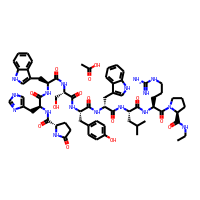
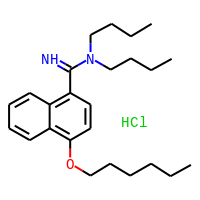

In [0]:
mols[['Active', 'DSSTox_CID', 'FW', 'Formula', 'ID', 'Molecule', 'SMILES']].head(2)

Well, this data was originaly obtained from Toxicology Testing in the 21st Century ([Tox21](https://www.epa.gov/chemical-research/toxicology-testing-21st-century-tox21) ) database, federal collaboration among EPA, NIH, including National Center for Advancing Translational Sciences and the National Toxicology Program at the National Institute of Environmental Health Sciences, and the Food and Drug Administration.

They have been studied biological activity of thousands compounds to evaluate their toxicity and risk for human health.

In this database, you can see the molecular formula, molecular structure, and also, binary data whether the molecule has toxic activity or not.

In [0]:
mols['Active'][0:4]

0    0
1    0
2    0
3    0
Name: Active, dtype: object

In [0]:
print("Number of   active molecules:  ", list(mols.Active).count('1'))  #Active
print("Number of inactive molecules:  ", list(mols.Active).count('0'))  #Inactive

Number of   active molecules:   380
Number of inactive molecules:   8977


So, it would be nice if you can "predict" toxicity from molecular structure using some machine learning model. It will help to avoid dangerous chemicals and to find candidates of new drugs.

However, molecular structures are so complex so that you would convert them into some numeric representation, so called molecular descriptors.

Actually, there have been hundreds of "molecular descriptors" and it's still growing.

Fortunately, some of them are already implemented in RDKit library.

In [0]:
names = [x[0] for x in Descriptors._descList]
print("Number of descriptors in the rdkit: ", len(names))
np.array(names)[0:10]


Number of descriptors in the rdkit:  200


array(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt',
       'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons'],
      dtype='<U24')

In [0]:
for desc in ['TPSA','MaxPartialCharge','SlogP_VSA1','EState_VSA1','SMR_VSA1','MolLogP','MolMR','BalabanJ','Ipc','HallKierAlpha','Kappa1','Kappa2','Kappa3','RingCount','NumHAcceptors','NumHDonors']:
    exec("mols[desc]=vec(Descriptors.{})(mols['Molecule'])".format(desc))
print("shape of data : {}".format(mols.shape))


shape of data : (9357, 23)


In [0]:
print(mols.isnull().any())

Active              False
DSSTox_CID          False
FW                  False
Formula             False
ID                  False
Molecule            False
SMILES              False
TPSA                False
MaxPartialCharge     True
SlogP_VSA1          False
EState_VSA1         False
SMR_VSA1            False
MolLogP             False
MolMR               False
BalabanJ            False
Ipc                 False
HallKierAlpha       False
Kappa1              False
Kappa2              False
Kappa3              False
RingCount           False
NumHAcceptors       False
NumHDonors          False
dtype: bool


In [0]:
mols_desc=mols.drop(["MaxPartialCharge","Ipc","Kappa3", "Active", "DSSTox_CID", "FW", "Formula", "ID", "Molecule", "SMILES"], axis=1)

Let's see the distribution and correlation of some molecular features.

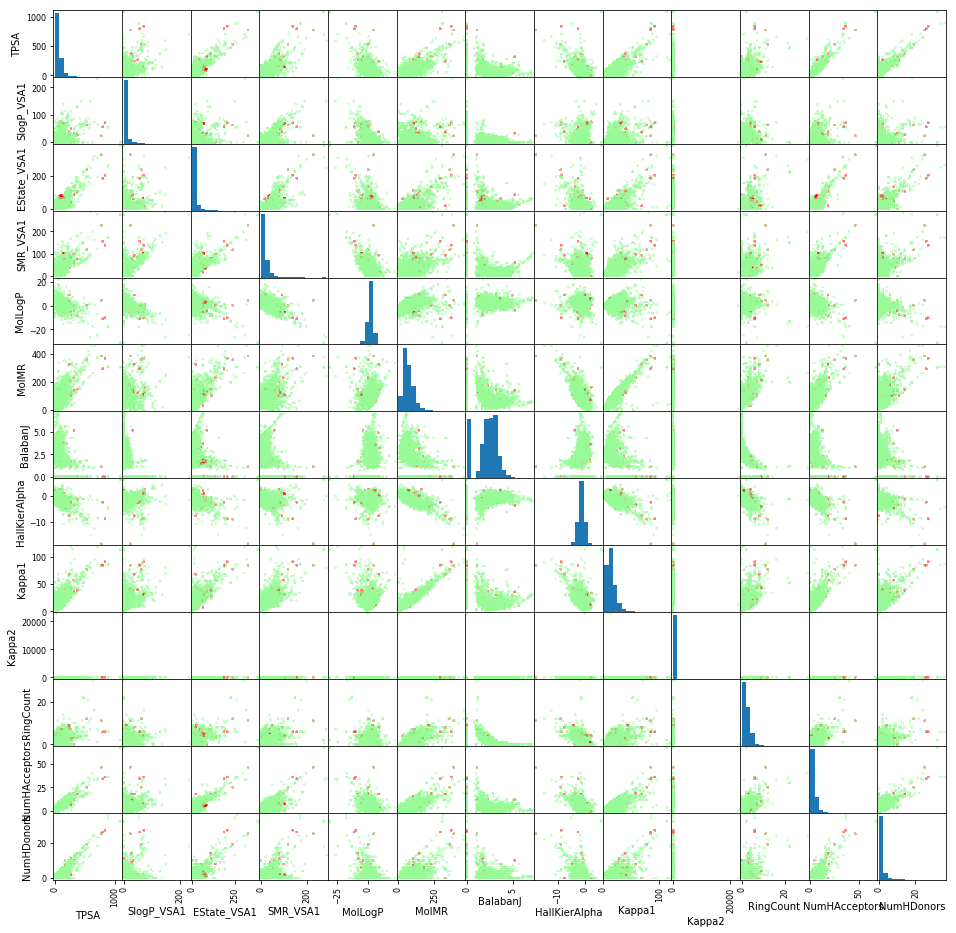

In [0]:
def set_color(L):
  tmp = []
  for l in L:
    if l == '1':
      tmp.append("red")
    else:
      tmp.append("palegreen")
  return tmp

pd.plotting.scatter_matrix(mols_desc,figsize=(16,16), hist_kwds={'bins':15},  
                           marker='+', s=8, alpha=.5, c=set_color(mols.Active))
plt.show()

### Classifier

As for an exmaple, apply Random Forest Classifiler to classify the molecules by toxic or not.

For validation, it is important to separate training data and test data.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(mols_desc, mols.Active, train_size=0.75, test_size=0.25)

In [0]:
print("Training Data")
print("Number of   active molecules:  ", list(y_train).count('1'))
print("Number of inactive molecules:  ", list(y_train).count('0'))
print("Test Data")
print("Number of   active molecules:  ", list(y_test).count('1'))
print("Number of inactive molecules:  ", list(y_test).count('0'))

Training Data
Number of   active molecules:   284
Number of inactive molecules:   6733
Test Data
Number of   active molecules:   96
Number of inactive molecules:   2244


### Random Forest

Actrually, algorithms of [Random Forest](https://en.wikipedia.org/wiki/Random_forest) is not very simple. I would not explain in detail here.

Fortunately, this method is implemented in [scikit-learn](https://scikit-learn.org/stable/) library.

It's easy to use. Give the training and target data to the model.

In [0]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)


Accuracy on training set: 0.992
Accuracy on test set:        0.972


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Now evaluate the results.

It isn't bad, is it?

In [0]:
print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set:     {:.3f}".format(model.score(X_test , y_test)))
df = pd.DataFrame(model.feature_importances_, index = X_train.columns)
df

Accuracy on training set: 0.992
Accuracy on test set:     0.972


,0
TPSA,0.066532
SlogP_VSA1,0.071607
EState_VSA1,0.070389
SMR_VSA1,0.072619
MolLogP,0.069738
MolMR,0.098332
BalabanJ,0.102071
HallKierAlpha,0.103571
Kappa1,0.073705
Kappa2,0.097336


In scikit-learn library there are hundreds of tools and algorithms have been implemented. You may choose other models and methods to predict / classify molecules using chemical descriptors.

There is no magic algorithm that can solve every problems of machine learning. 
